## Business Case: The direct marketing campaigns of a Portuguese bank  which is based on phone calls (Tele-Marketing) to their client for subscribing to term deposit products. We have to predict successful subscribers to the term deposit.



## Problem Defination
In this project the dataset gives us information about a marketing campaign of a financial institution in which we have to analyze it and use proper machine learning algorithm, in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

The dataset is from May 2008 to November 2010.


# What is Term Deposit?

A term deposit is a deposit that a bank or any financial institutions offers with a fixed interest rate in which your money will be returned back at a specific maturity time.

In Term Deposits, the sum of money is kept for a fixed maturity and the depositor is not allowed to withdraw this sum till the end of the maturity period. That is why they are called as Term Deposits because they are kept up to a particular term.

Typically, term deposits offer higher interest rates than traditional liquid savings accounts, whereby customers can withdraw their money at any time.

In [1]:
# Importing necessary libraries.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
# creating dataframe to read the data set

ds=pd.read_csv('bank-additional-full.csv',sep=';')
ds.head()                                                 # for top 5 entries of the data set

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Basic Checks

In [3]:
ds.info()            # checking the data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
ds.shape                   # find no. of rows and columns.

(41188, 21)

In [5]:
ds.describe()         # describing the numericals columns

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
ds.describe(include='object')        # describing categorical data

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [7]:
for col in ds.select_dtypes(include='object').columns:      # for getting categorical features and its unique values.
    print(col)
    print(ds[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


# DOMAIN ANALYSIS

Our data contains 41188 observations of 21 features, where there are 11 categorical features and 10 numeric features.


# FEATURES:
Input variables:
   # bank client data:
   1 - age (numeric) min=17, max=98.
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown").
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed).
   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown").
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  
   # other attributes:
 
 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 
 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
 
 14 - previous: number of contacts performed before this campaign and for this client (numeric)
 
 15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
 
 # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
 
 17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
 
 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
 
 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
 
 20 - nr.employed: number of employees - quarterly indicator (numeric)

 # Output variable (desired target):
 
 21 - y - has the client subscribed a term deposit? (binary: "yes","no")


# Checking the Target Data 

In [8]:
ds['y'].value_counts()                                            # output variable class count

no     36548
yes     4640
Name: y, dtype: int64

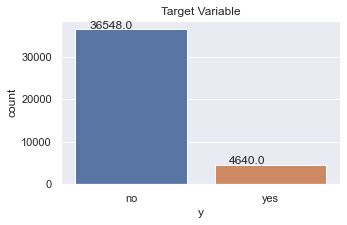

<AxesSubplot:ylabel='y'>

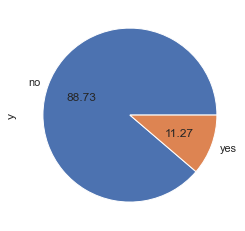

In [9]:
plt.figure(figsize=(5,3))

ax=sns.countplot(x='y',data=ds)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.title('Target Variable')
plt.show()

ds['y'].value_counts().plot(kind='pie', autopct='%.2f')

This is imbalance dataset, as distribution ratio is high i.e ***89:11***.

# EXPLORATORY DATA ANALYSIS
1- Find Duplicates data & drpping them.

2- Finding mising values.

3- Replacing Unknown with 'mode'.

4- Univariate analysis of categorical variables.

5- Univariate analysis of numerical variables.

6- Multivariate analysis.

# Feature Engineering

7- Handling outliers (numericals).

8- handling categorical features..

9- Assigning independent and dependent variables..

10- Handling imbalanced data.


In [10]:
# Lets check are their any duplicate data present in our dataset.

ds[ds.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [11]:
# As there are 12 duplicate row present, we will drop it.

ds.drop_duplicates(keep='first',inplace=True)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

# Finding Missing values

In [12]:
ds.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
ds.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Takeaway
There are no missing values.

But there are some 'unknown' values in columns. So We will replace all the 'unknown' with the mode.

In [14]:
# replacing "unknown" with the mode
cat_v= ds.select_dtypes(include=['object']).columns
for column in cat_v:
    mode= ds[column].mode()[0]
    ds[column]= ds[column].replace("unknown", mode)

# Univariate Analysis of categorical variables

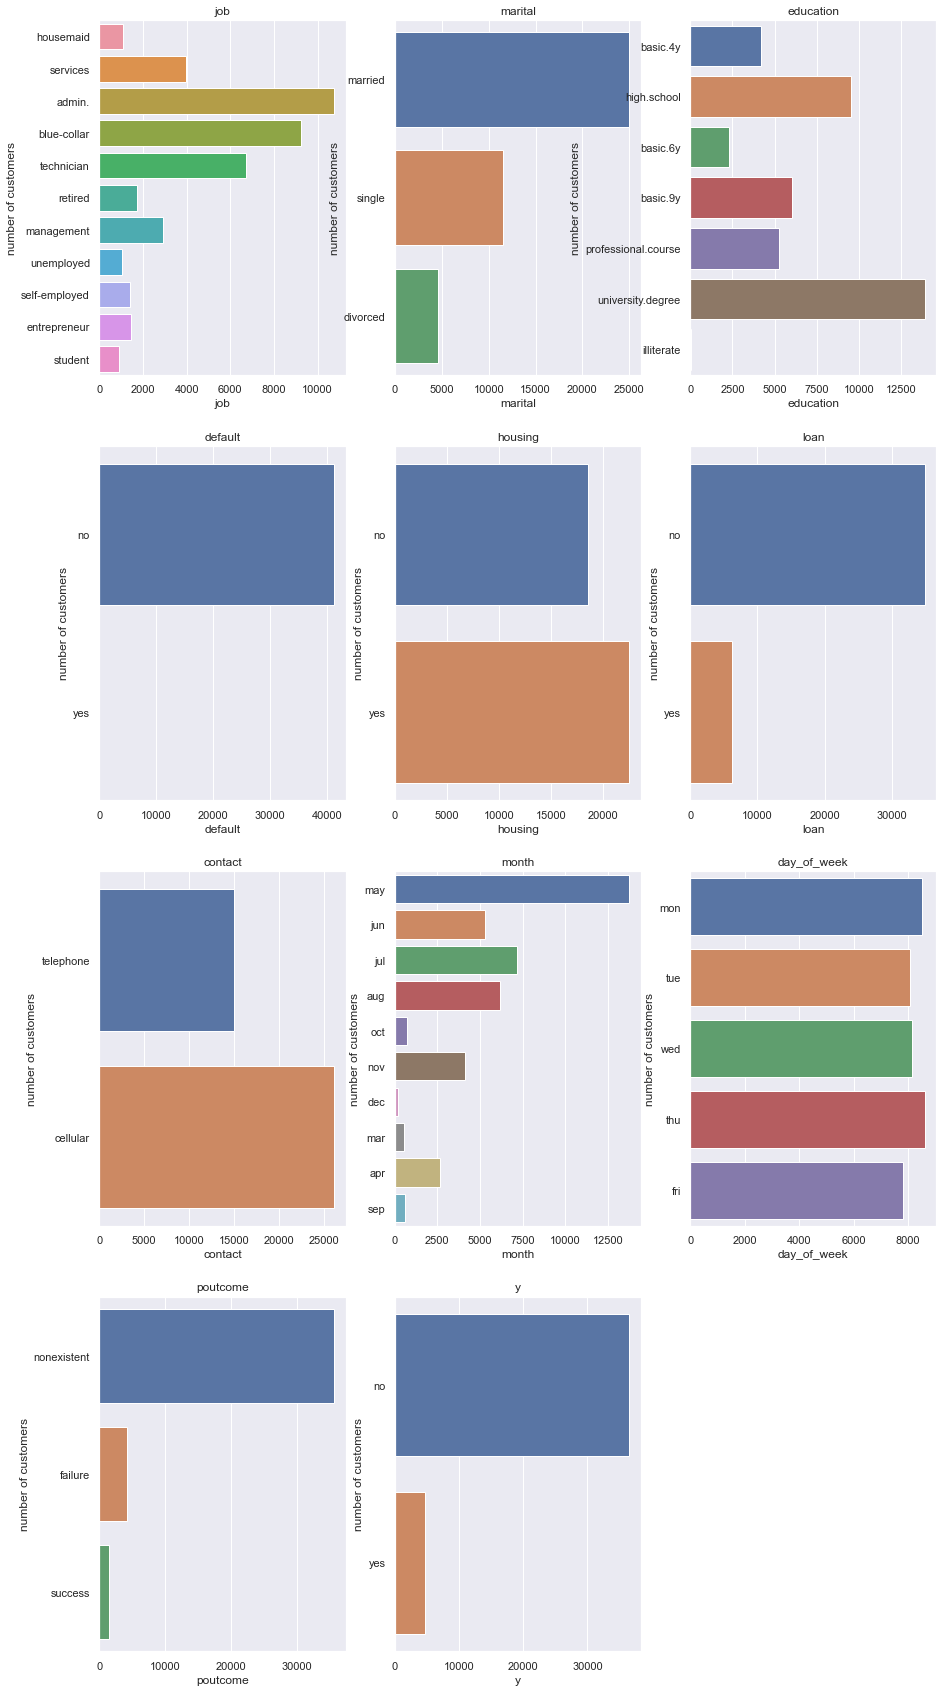

In [15]:
#  plotting bar chart for categorical variable and their unique features.

cat_v= ds.select_dtypes(include=['object']).columns
plt.figure(figsize=(15,30))
plotnumber=1
for column in cat_v:
    if plotnumber<=21:
        
        plt.subplot(4,3,plotnumber)
        sns.countplot(y=column,data=ds)
        plt.xlabel(column)
        plt.ylabel("number of customers")
        plt.title(column)
        plotnumber+=1
plt.show()
      

# From graph :

-> From the 1st graph which tells usabout the job, the majority lies in these three category - adminstrator, blue- collar, technician.

-> Our huge number of customers are married (i.e **>60%**).

-> Majority of client have done high school & has university degree.

-> Most customers do not have any loan.

-> Cellular phones are the most favoured method contacting the customers.

-> Many customers have been contacted in the month of May.

# Univariate Analysis of Numerical Columns 

In [16]:
num_v= ds.select_dtypes(include=np.number)      # for identifying the numerical datas.
num_v.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


Since pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m and nr.employed consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.

In [17]:
ds.drop(columns=["pdays", "previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"],axis=1, inplace=True)

In [18]:
num_v1=ds.select_dtypes(include=np.number)      
num_v1.head()

,age,duration,campaign
0,56,261,1
1,57,149,1
2,37,226,1
3,40,151,1
4,56,307,1


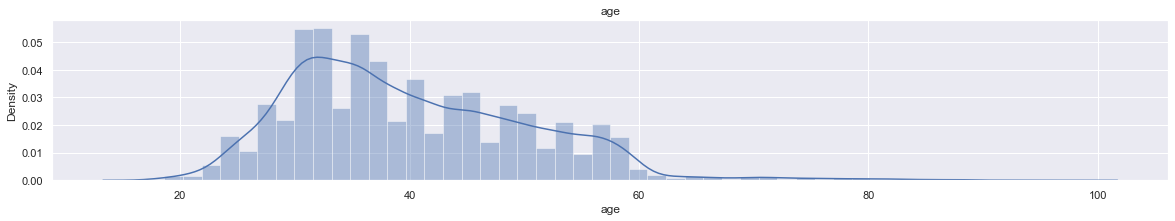

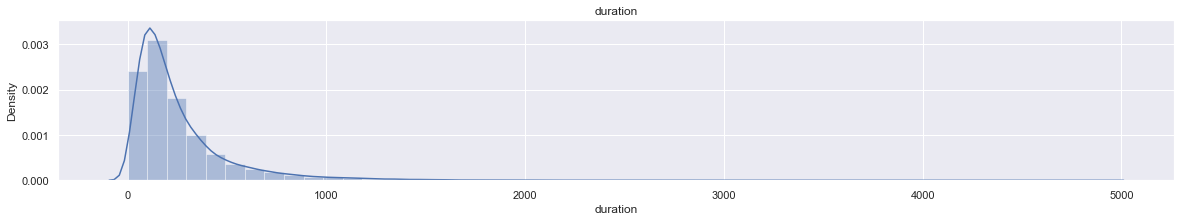

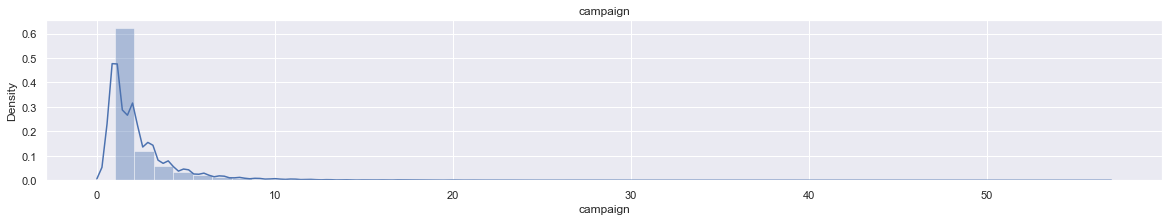

In [19]:
plotnumber=1
for column in num_v1:
     if plotnumber<=3:
        plt.figure(figsize=(20,10))
        plt.subplot(3,1,plotnumber)
        sns.distplot(ds[column],kde=True)
        plt.title(column)

From the above graphs of duration and campaign, we can see clearly they are positively skewed. That means there are outliers in the data.

# Multivariate Analysis

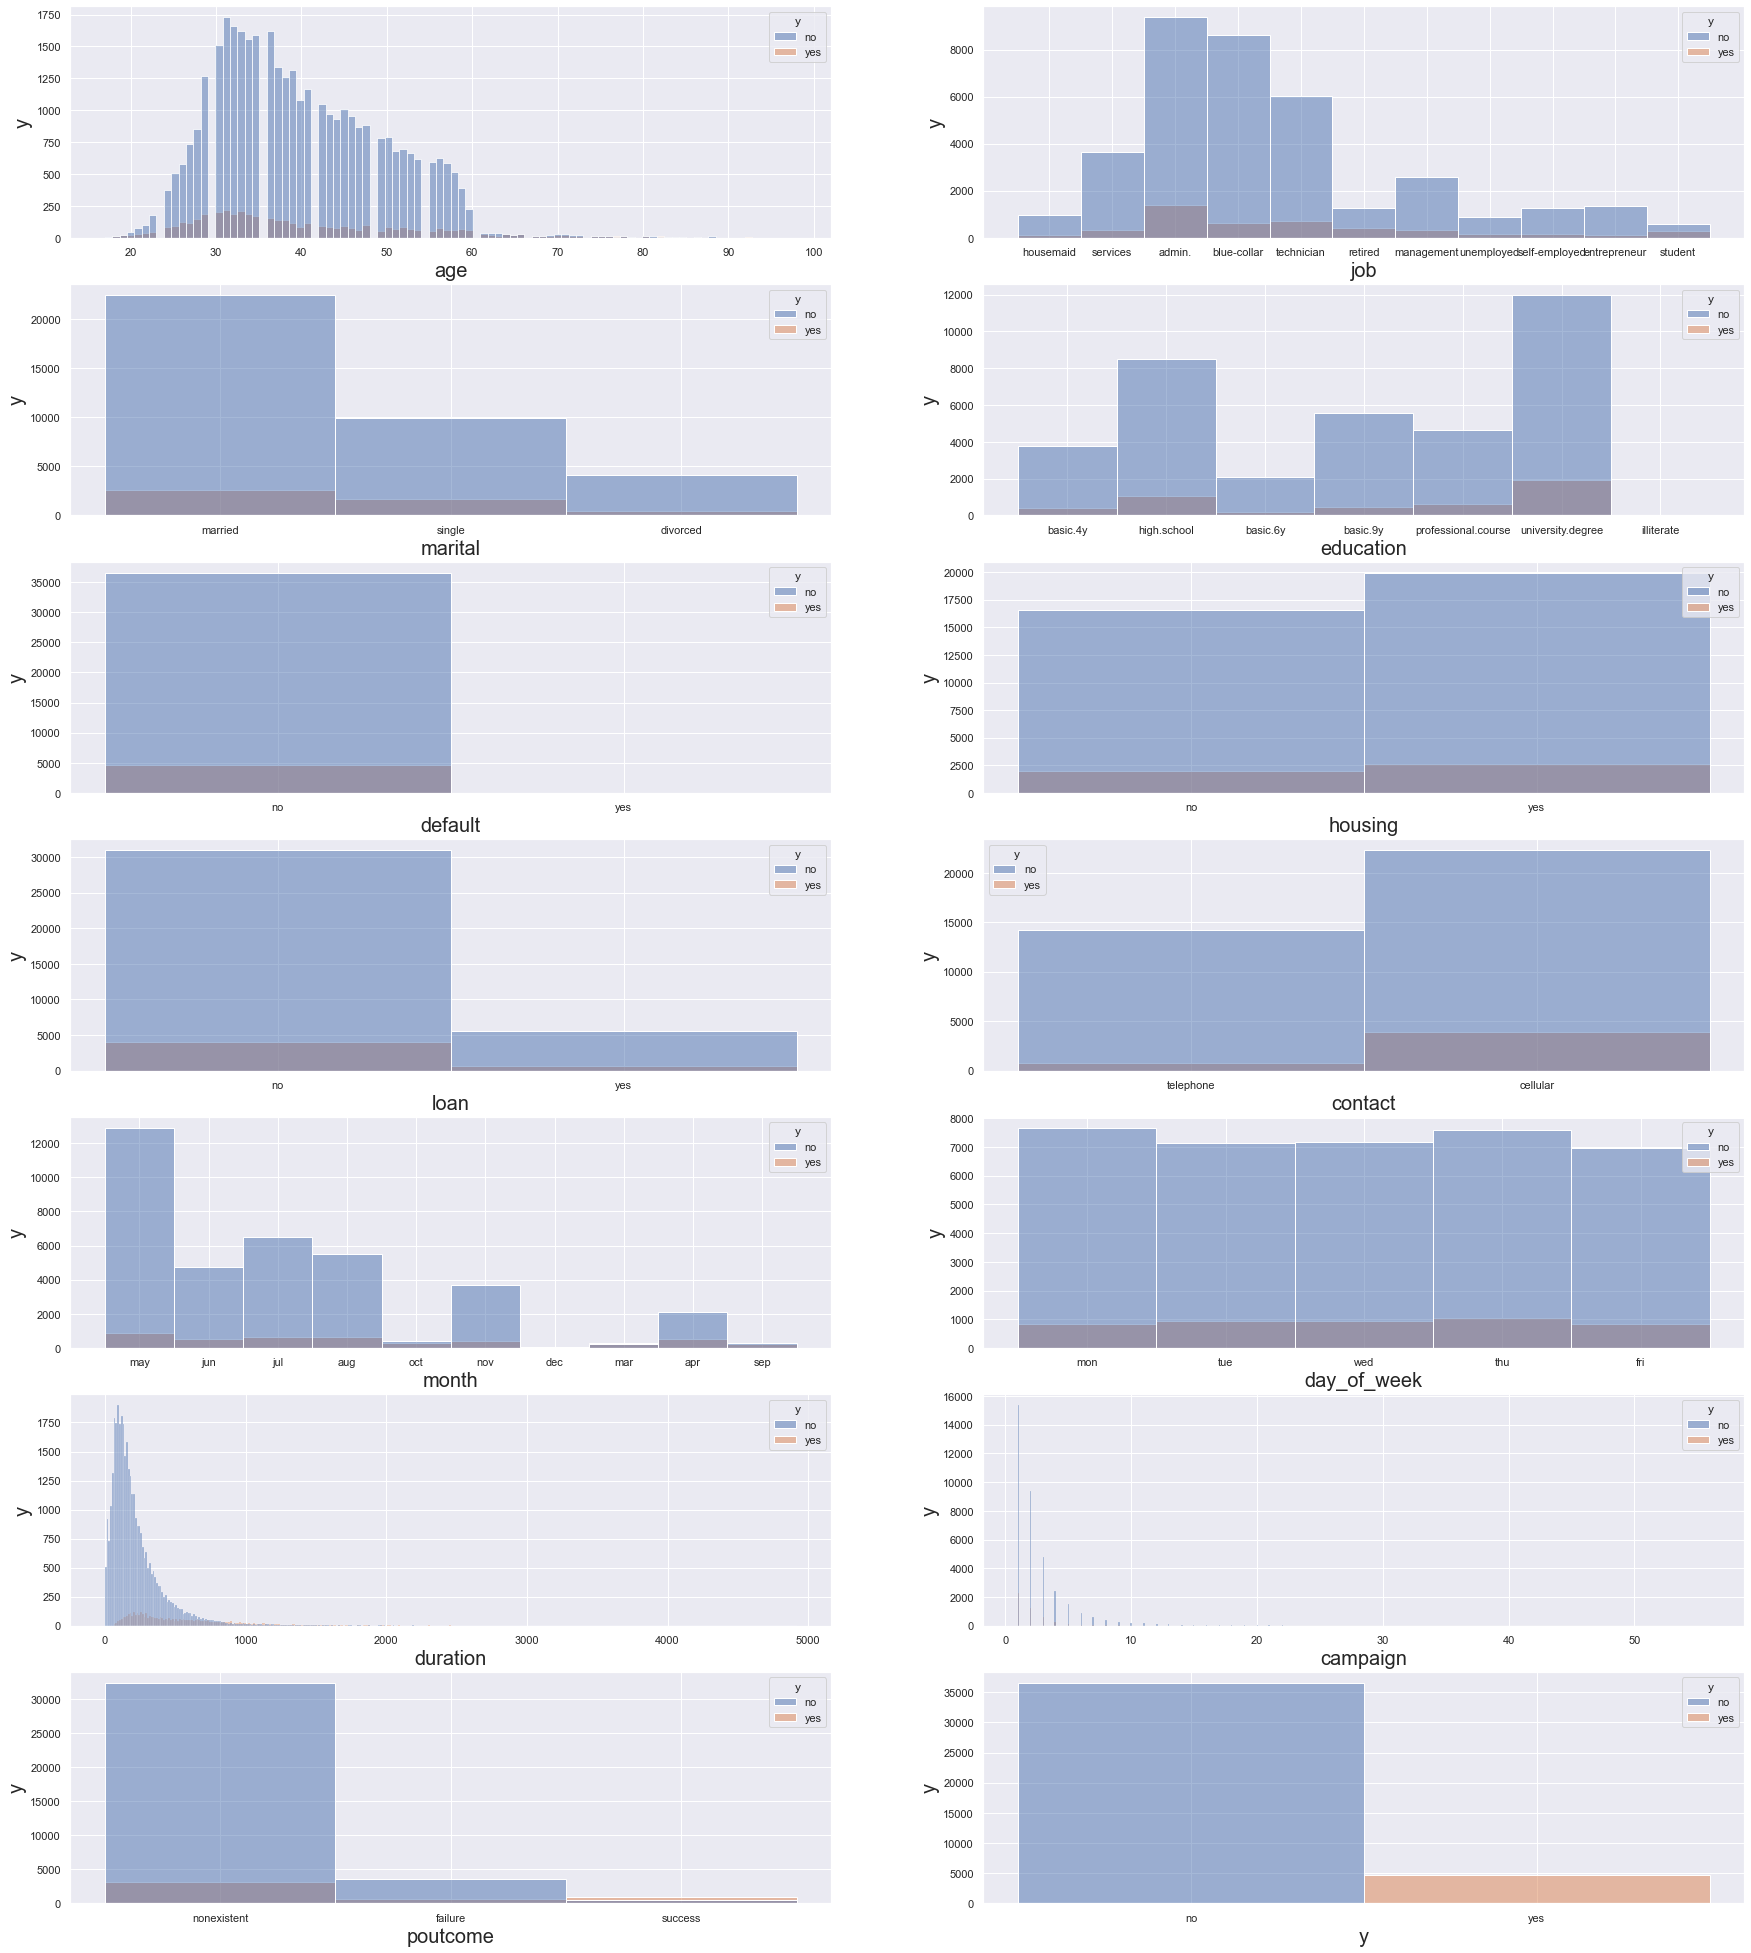

In [20]:
plt.figure(figsize=(30,40), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 

for column in ds.columns:                   # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=15 :                     # as there are  now 14 columns in the data
        ax = plt.subplot(8,2,plotnumber)    # plotting 14 graphs (7-rows,2-columns) ,plotnumber is for count  
        sns.histplot(x=ds[column],hue=ds.y) # it give frequency hue =value counts
        plt.xlabel(column,fontsize=20)      # assigning name to x-axis and "name" font size is 20
        plt.ylabel('y',fontsize=20)         # assigning name to y-axis and "name" font size is 20
    plotnumber+=1                           # increment of plotnumber 
plt.show()

# Insights

* The maximum number of client who subscribe for the 'term deposit' are in the age of 28-40 range.

* Admin, blue-collar and technician have high number of subscriber, where as student has highest ratio of subscriber.

* Married client has most number of subscriber followed by single and divorced.

* Those with University degree are more in number.

* Client with no default are more subscriber.

* Those with housing have opted more in number than others.

* Client not having loan opted more for term deposit.

* Those who have given their cellular contact number have number subscriber than other.

* March, September and October have high ratio of conversion, where as highest number opf subscriber are in may month.

* Nothing significant insights from number of days and any other remaining parameters.

# Handling the outliers.

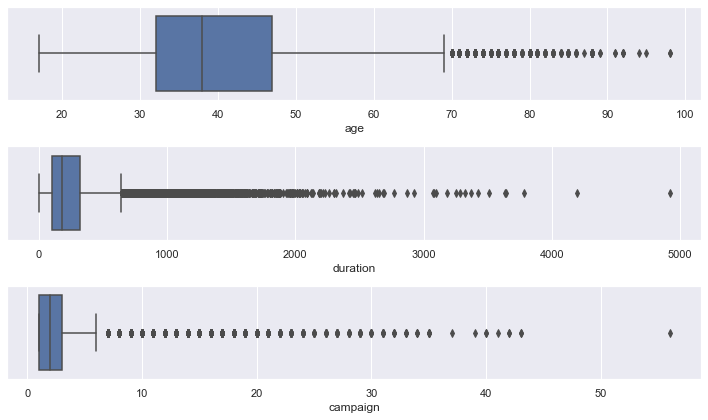

In [21]:
# Checking the outliers.

plt.figure(figsize=(10,6))
plotnum=1
for c in num_v1:
    if(plotnum<5):
        plt.subplot(3,1,plotnum)
        sns.boxplot(num_v1[c])
    plotnum+=1
plt.tight_layout()

In [22]:
from scipy import stats

**For Age**

In [23]:
IQR= stats.iqr(ds.age, interpolation='midpoint')
IQR

15.0

In [24]:
Q1=ds.age.quantile(0.25)                    # defining 25% of data
Q3=ds.age.quantile(0.75)                    # defining 75% of data

min_limit=Q1 - 1.5*IQR              # setting minimum limit

max_limit=Q3 + 1.5*IQR              # setting maximum limit

In [25]:
print('Minimum age limit : ', min_limit)
print('Maximum age limit : ' , max_limit)

Minimum age limit :  9.5
Maximum age limit :  69.5


In [26]:
ds.loc[ds['age']<min_limit]                   #   checking values which are less than minimum limit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y


In [27]:
ds.loc[ds['age']>max_limit]                   #checking values which are greater than maximum limit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
27713,70,retired,divorced,basic.4y,no,yes,no,cellular,mar,mon,187,3,nonexistent,yes
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,167,9,nonexistent,no
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,179,1,failure,no
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,48,1,nonexistent,no
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,266,2,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,retired,divorced,basic.4y,no,yes,yes,cellular,oct,mon,138,4,success,no
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,621,1,failure,yes
41004,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,411,1,failure,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,nonexistent,yes


In [28]:
#imputing outlier with with median

ds.loc[ds['age']>max_limit,'age']=np.median(ds.age)

In [29]:
#checking whether outlier remove or not.

ds.loc[ds['age']>max_limit] 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y





**For Duration**

In [30]:
#calculating Inter quantile range.

IQR = stats.iqr(ds.duration, interpolation = 'midpoint') 

IQR

217.0

In [31]:
Q1=ds.duration.quantile(0.25)
Q3=ds.duration.quantile(0.75)

min_limit=Q1 - 1.5*IQR 

max_limit=Q3 + 1.5*IQR 

In [32]:
print('Minimum duration limit : ', min_limit)
print('Maximum duration limit : ' , max_limit)

Minimum duration limit :  -223.5
Maximum duration limit :  644.5


In [33]:
ds.loc[ds['duration']<min_limit]                        #  checking values which are less than minimum limit.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y


In [34]:
ds.loc[ds['duration']>max_limit]           #checking values which are greater than maximum limit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
37,52,technician,married,basic.9y,no,yes,no,telephone,may,mon,1666,1,nonexistent,no
57,45,services,married,high.school,no,yes,no,telephone,may,mon,787,1,nonexistent,no
61,51,blue-collar,married,basic.9y,no,yes,no,telephone,may,mon,812,1,nonexistent,no
75,41,blue-collar,divorced,basic.4y,no,yes,no,telephone,may,mon,1575,1,nonexistent,yes
83,49,entrepreneur,married,university.degree,no,yes,no,telephone,may,mon,1042,1,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41147,25,technician,single,professional.course,no,yes,no,cellular,nov,fri,712,2,success,yes
41153,67,housemaid,divorced,professional.course,no,yes,no,cellular,nov,mon,655,2,success,yes
41160,33,admin.,married,university.degree,no,no,no,cellular,nov,tue,843,1,nonexistent,yes
41164,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,1868,2,success,yes


In [35]:
#imputing outlier with with median.

ds.loc[ds['duration']>max_limit,'duration']=np.median(ds.duration)

In [36]:
ds.loc[ds['duration']>max_limit]                                #checking whether outlier remove or not

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y


**For Campaign**

In [37]:
IQR = stats.iqr(ds.campaign, interpolation = 'midpoint') 

IQR

2.0

In [38]:
Q1=ds.campaign.quantile(0.25)
Q3=ds.campaign.quantile(0.75)

min_limit=Q1 - 1.5*IQR 

max_limit=Q3 + 1.5*IQR

In [39]:
print('Minimum campaign limit : ', min_limit)
print('Maximum campaign limit : ' , max_limit)

Minimum campaign limit :  -2.0
Maximum campaign limit :  6.0


In [40]:
ds.loc[ds['campaign']<min_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y


In [41]:
ds.loc[ds['campaign']>max_limit]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
887,54,admin.,married,university.degree,no,no,no,telephone,may,wed,388,7,nonexistent,no
1043,41,technician,single,university.degree,no,no,no,telephone,may,wed,79,8,nonexistent,no
1094,40,technician,married,professional.course,no,yes,no,telephone,may,wed,253,8,nonexistent,no
1097,51,blue-collar,married,basic.4y,no,yes,no,telephone,may,wed,244,7,nonexistent,no
1230,48,blue-collar,divorced,basic.4y,no,no,no,telephone,may,thu,521,7,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,38,retired,married,basic.9y,no,no,no,telephone,sep,fri,543,9,failure,no
40631,38,retired,married,basic.4y,no,yes,no,cellular,sep,mon,213,7,nonexistent,no
40698,29,technician,single,professional.course,no,yes,no,cellular,sep,mon,157,7,success,no
40821,33,technician,single,professional.course,no,yes,no,cellular,sep,fri,246,9,failure,no


In [42]:
# Imputing outlier with with median.

ds.loc[ds['campaign']>max_limit,'campaign']=np.median(ds.campaign)

In [43]:
ds.loc[ds['campaign']>max_limit]                   # Checking whether outlier remove or not

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y


In [44]:
# without outliers

ds.describe()

,age,duration,campaign
count,41176.000000,41176.000000,41176.000000
mean,39.581212,201.596197,2.041748
std,9.621591,135.989810,1.242412
min,17.000000,0.000000,1.000000
25%,32.000000,102.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,265.000000,3.000000
max,69.000000,644.000000,6.000000


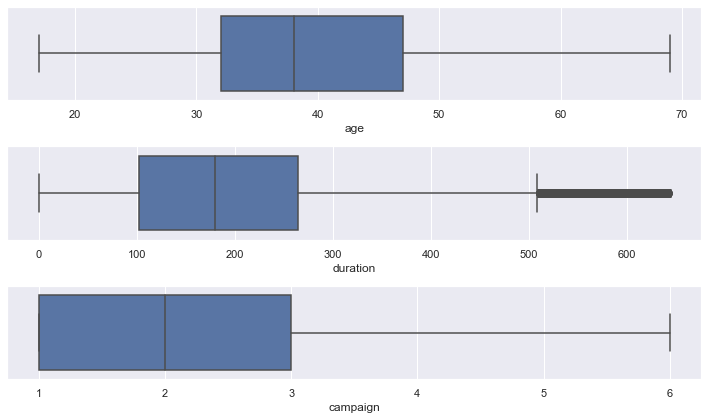

In [45]:
# after handling the outliers, checking it.

num_v2= ds.select_dtypes(include=np.number)


plt.figure(figsize=(10,6))
plotnum=1
for c in num_v2:
    if(plotnum<5):
        plt.subplot(3,1,plotnum)
        sns.boxplot(num_v2[c])
    plotnum+=1
plt.tight_layout()

# Handling Categorical Features

**Features like job education month day_of_week has so many categories, we will Label Encode them as One Hot Encoding would create so many columns.**

In [46]:
cat_v

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [47]:
# check categorical class
for i in cat_v:
    print(i, ":", ds[i].unique())

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
marital : ['married' 'single' 'divorced']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome : ['nonexistent' 'failure' 'success']
y : ['no' 'yes']


In [48]:
from sklearn.preprocessing import LabelEncoder          # initializing label encoder.
le= LabelEncoder()

for i in cat_v:                                  # iterating through every categorical feature and label encoding them.
    ds[i]= le.fit_transform(ds[i])
    
    
ds.head()    

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,56,3,1,0,0,0,0,1,6,1,261,1,1,0
1,57,7,1,3,0,0,0,1,6,1,149,1,1,0
2,37,7,1,3,0,1,0,1,6,1,226,1,1,0
3,40,0,1,1,0,0,0,1,6,1,151,1,1,0
4,56,7,1,3,0,0,1,1,6,1,307,1,1,0


# Independent and Dependent variables

In [49]:
X= ds.drop(columns=['y'])                   # assiging feature variable to 'X'

Y= ds['y']              # assiging target variable to 'Y'

# Handling the Imbalanced Data


**As the target variable is is ratio of 89:11, it show that it is highly imbalanced, So we need to resample it it.**

In [50]:
!pip install imblearn                  

**Imblearn techniques are the methods by which we can generate a data set that has an equal ratio of classes.We mainly have two options to treat an imbalanced data set that are Upsampling and Downsampling.**

For that we use SMOTE technique. SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem

In [51]:
from collections import Counter              # importing counter to check count of each label.
from imblearn.over_sampling import SMOTE

sm= SMOTE()                                  
print(Counter(Y))                # checking count for each class.

X_sm,Y_sm= sm.fit_resample(X,Y)               # Applying sampling on target variable
print(Counter(Y_sm))                         # Checking count after sampling for each class

Counter({0: 36537, 1: 4639})
Counter({0: 36537, 1: 36537})


# Feature Selection

<AxesSubplot:>

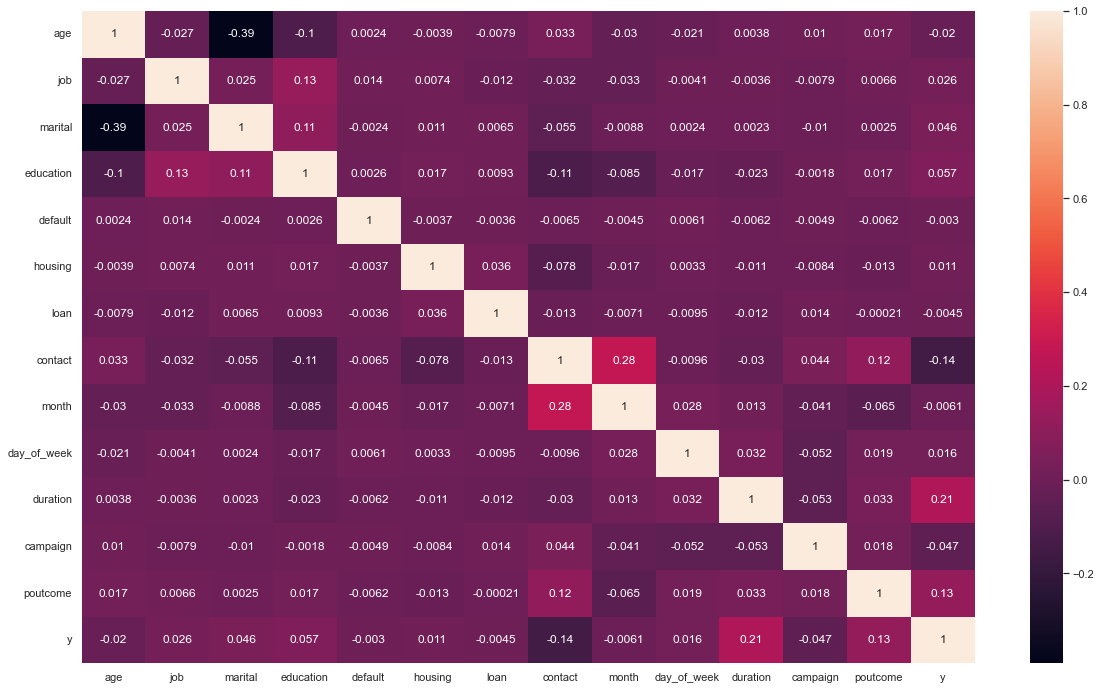

In [52]:
plt.figure(figsize=(20,12))
sns.heatmap(ds.corr(), annot=True)

**Since there are no features that are highly correlated neither positively (>0.80) nor negatively (>-0.80).**

# *Model Creation*

In [53]:
X_sm

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,56,3,1,0,0,0,0,1,6,1,261,1,1
1,57,7,1,3,0,0,0,1,6,1,149,1,1
2,37,7,1,3,0,1,0,1,6,1,226,1,1
3,40,0,1,1,0,0,0,1,6,1,151,1,1
4,56,7,1,3,0,0,1,1,6,1,307,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73069,33,0,1,6,0,0,0,0,6,1,180,1,1
73070,57,0,1,6,0,0,0,0,4,3,245,1,1
73071,43,7,0,1,0,1,0,0,3,1,180,1,1
73072,47,0,0,3,0,0,0,0,6,0,464,1,1


# LOGISTIC REGRESSION

In [54]:
from sklearn.preprocessing import StandardScaler      # scaling the data
scalar= StandardScaler()                              # object creation
X_scaled= scalar.fit_transform(X_sm)
X_scaled                                            # scaled data

array([[ 1.64685711, -0.17652657, -0.18473301, ...,  0.1737339 ,
        -0.73858613,  0.24796905],
       [ 1.74461241,  0.96082017, -0.18473301, ..., -0.60352139,
        -0.73858613,  0.24796905],
       [-0.21049347,  0.96082017, -0.18473301, ..., -0.06915838,
        -0.73858613,  0.24796905],
       ...,
       [ 0.37603829,  0.96082017, -1.82716888, ..., -0.38838823,
        -0.73858613,  0.24796905],
       [ 0.76705947, -1.02953662, -1.82716888, ...,  1.58250912,
        -0.73858613,  0.24796905],
       [ 0.66930417, -1.02953662, -0.18473301, ..., -0.38838823,
        -0.73858613,  0.24796905]])

In [55]:
# Splitting training and testing data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(X_sm, Y_sm, test_size=0.20, random_state=42)

In [56]:
print('x_train shape is : ', x_train.shape)
print('x_test shape is : ', x_test.shape)

x_train shape is :  (58459, 13)
x_test shape is :  (14615, 13)


In [57]:
# Creating logistic regression model

from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()                          # object ceation pf logistic regression

log_reg.fit(x_train, y_train)                       # training model with training data

LogisticRegression()

In [58]:
y_train_pre= log_reg.predict(x_train)           # predicting 'y_train'

**Lets see how well our model performs on the test data set**

In [59]:
y_pre= log_reg.predict(x_test)                # predicting 'y_test'


In [60]:
print('The shape of y_train (row and column) is : ', y_train_pre.shape)
print('The shape of y_pre (row and column) is : ',y_pre.shape)

The shape of y_train (row and column) is :  (58459,)
The shape of y_pre (row and column) is :  (14615,)


**Evaluating the model**

In [61]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score

In [62]:
# Confusion Matrix
pd.crosstab(y_test, y_pre)

col_0,0,1
y,,
0,5244,2104
1,1720,5547


In [63]:
confusion_matrix(y_test, y_pre)

array([[5244, 2104],
       [1720, 5547]], dtype=int64)

In [64]:
# Recall (recall varies from 0.0 to 1.0)
Recall = recall_score(y_test,y_pre)      # '''the total number of positive results how many positives were
                                         #     correctly predicted by the model.'''
Recall

0.7633136094674556

In [65]:
report= classification_report(y_test,y_pre)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      7348
           1       0.73      0.76      0.74      7267

    accuracy                           0.74     14615
   macro avg       0.74      0.74      0.74     14615
weighted avg       0.74      0.74      0.74     14615



In [66]:
auc= roc_auc_score(y_test, y_pre)
auc

0.7384885956972552

**ROC Plot**

In [67]:
log_reg.predict_proba(x_test)

array([[0.85364734, 0.14635266],
       [0.63804813, 0.36195187],
       [0.31605037, 0.68394963],
       ...,
       [0.31762437, 0.68237563],
       [0.68918408, 0.31081592],
       [0.29060041, 0.70939959]])

In [68]:
## Prediciting the probabilities 

probs=log_reg.predict_proba(x_test)[:, 1]  # for all the records and column index 1 (ie., class 1)
probs

array([0.14635266, 0.36195187, 0.68394963, ..., 0.68237563, 0.31081592,
       0.70939959])

In [69]:
# defining the threshold limit
 
def predict_threshold(model,X_test,thresholds):
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0)

# if given condition is true, then it will return '1' else return '0'

In [70]:
for thr in np.arange(0,1,0.1):
    y_predict= predict_threshold(log_reg,x_test,thr)
    print('Threshold : ', thr)
    print(confusion_matrix(y_test,y_predict))

Threshold :  0.0
[[   0 7348]
 [   0 7267]]
Threshold :  0.1
[[1317 6031]
 [  97 7170]]
Threshold :  0.2
[[2510 4838]
 [ 283 6984]]
Threshold :  0.30000000000000004
[[3476 3872]
 [ 559 6708]]
Threshold :  0.4
[[4410 2938]
 [1021 6246]]
Threshold :  0.5
[[5244 2104]
 [1720 5547]]
Threshold :  0.6000000000000001
[[6042 1306]
 [2629 4638]]
Threshold :  0.7000000000000001
[[6685  663]
 [4083 3184]]
Threshold :  0.8
[[7067  281]
 [5516 1751]]
Threshold :  0.9
[[7276   72]
 [6581  686]]


In [71]:
# visualizing the ROC plot.

def plot_roc_curve(fpr, tpr):                            # function to plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')               #line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')                           # assigning name to  x axis
    plt.ylabel('True Positive Rate')                               # assigning name to y axis
    plt.title('Receiver Operating Characteristic (ROC) Curve')     #assigning name to curve  
    plt.legend()                      # area describing the elements of the graph
    plt.show()                       # to show graph without location

In [72]:
auc = roc_auc_score(y_test, probs)         # roc curve 
print('AUC: %.2f' % auc)

AUC: 0.81


In [73]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

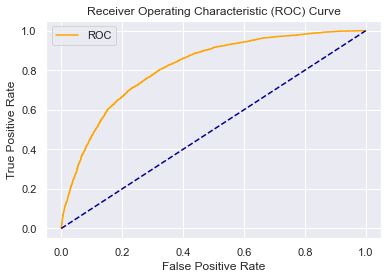

In [74]:
plot_roc_curve(fpr, tpr)         #plotting ruc curve

*********************************************************************
* Logistic Regression Accuracy Score(in %) for Scaled data = 73% .
*********************************************************************

# KNN-Algoritm

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
# Splitting training and testing data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(X_sm, Y_sm, test_size=0.20, random_state=42)

In [77]:
# taking optimal value of 'k' to determine how many nearest neighbors to create

error_rate=[]                  # create a list to store error value of 'k'.

for i in range(1,11):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i= knn.predict(x_test)
    error_rate.append(np.mean(pred_i !=y_test))
    print(np.mean(pred_i !=y_test))

0.091549777625727
0.08012316113581937
0.1087923366404379
0.09962367430721861
0.12357167293876155
0.11276086212795074
0.13205610673965104
0.1247348614437222
0.13944577488881285
0.13171399247348614


Text(0, 0.5, 'Error Rate')

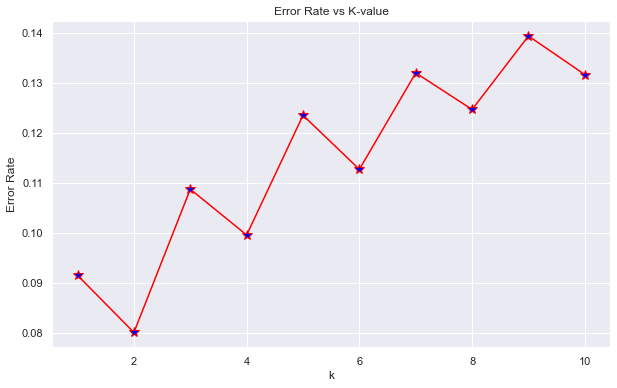

In [78]:
# Lets plot the K-value and error rate.

plt.figure(figsize=(10,6))
plt.plot(range(1,11), error_rate, color='red', linestyle='-', marker='*', markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K-value')
plt.xlabel('k')
plt.ylabel('Error Rate')

In [79]:
# Fitting the data into KNN model & see how it is performing.

knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)                # Predicting
y_pred= knn.predict(x_test)
y_pred_t= knn.predict(x_train)

In [80]:
print(classification_report(y_train,y_pred_t))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     29189
           1       0.89      1.00      0.94     29270

    accuracy                           0.94     58459
   macro avg       0.94      0.94      0.94     58459
weighted avg       0.94      0.94      0.94     58459



In [81]:
# Checking Accuracy Score

print('The accuracy score is : ', accuracy_score(y_test,y_pred))

The accuracy score is :  0.8912076633595621


In [82]:
# Confusion Matrix
pd.crosstab(y_test, y_pred)

col_0,0,1
y,,
0,5835,1513
1,77,7190


In [83]:
print(classification_report(y_test,y_pred))        # classification report

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      7348
           1       0.83      0.99      0.90      7267

    accuracy                           0.89     14615
   macro avg       0.91      0.89      0.89     14615
weighted avg       0.91      0.89      0.89     14615



*********************************************************************
* KNN Agorithm Accuracy Score(in %) for Scaled data = 89 % .
*********************************************************************

# Decision Tree Classifier

In [84]:
x_train,x_test,y_train,y_test= train_test_split(X_sm, Y_sm, test_size=0.20, random_state=42)

In [85]:
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1,
                            min_samples_split= 3, splitter= 'random')                 #object creation for decision tree  
DTC.fit(x_train, y_train)

y_hat= DTC.predict(x_test)
y_hat


array([1, 0, 1, ..., 0, 0, 1])

In [86]:
#Training score

y_train_predict=DTC.predict(x_train)                                   #passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)                     #checking accuracy
acc_train

0.8015874373492533

In [87]:
pd.crosstab(y_train,y_train_predict)

col_0,0,1
y,,
0,20445,8744
1,2855,26415


In [88]:
# Train score

print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78     29189
           1       0.75      0.90      0.82     29270

    accuracy                           0.80     58459
   macro avg       0.81      0.80      0.80     58459
weighted avg       0.81      0.80      0.80     58459



In [89]:
pd.crosstab(y_test,y_hat)

col_0,0,1
y,,
0,5084,2264
1,769,6498


In [90]:
# Test score

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      7348
           1       0.74      0.89      0.81      7267

    accuracy                           0.79     14615
   macro avg       0.81      0.79      0.79     14615
weighted avg       0.81      0.79      0.79     14615



*********************************************************************
* Decision Tree (Entropy) Accuracy Score(in %) for Scaled data = 79 %.
*********************************************************************

# Hyperparameters of DecisionTree- 'Grid Search Cross Validation'.

* It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 

* So,in the end, you can select the best parameters from the listed hyperparameters.

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values.

params = {
    "criterion":("gini", "entropy"),                           # quality of split.
    "splitter":("best", "random"),                             # searches the features for a split.
    "max_depth":(list(range(1, 20))),                          # depth of tree range from 1 to 19.
    "min_samples_split":[2, 3, 4],                             # the minimum number of samples required to split internal node.
    "min_samples_leaf":list(range(1, 20)),      
}                    # minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19.

tree_clf = DecisionTreeClassifier(random_state=3)                      #object creation for decision tree with random state 3.

tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
# passing model to gridsearchCV ,
# tree_clf-->model
# params---->hyperparametes(dictionary we created).
# scoring--->performance matrix to check performance.
# n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
# verbose=Controls the verbosity: the higher, the more messages.
# >1 : the computation time for each fold and parameter candidate is displayed;
# >2 : the score is also displayed;
# >3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
# cv------> number of folds.

tree_cv.fit(x_train,y_train)                         # training data on gridsearch cv
best_params = tree_cv.best_params_                   # it will give you best parameters 
print(f"Best paramters: {best_params})")             # printing  best parameters



Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [93]:
Bestparamters: ({'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})

In [94]:
tree_cv.best_params_                               # getting best parameters from cv.

{'criterion': 'gini',
 'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [95]:
tree_cv.best_score_                                  # getting best score from cv.

0.8678720887521859

In [96]:
DTC1= DecisionTreeClassifier(criterion='gini',max_depth=19,min_samples_leaf= 1,min_samples_split=2,splitter='best')
 # passing best parameter to decision tree.

In [97]:
DTC1.fit(x_train, y_train)                           # training model with best parameters.

DecisionTreeClassifier(max_depth=19)

In [98]:
y_hat1= DTC1.predict(x_test)                         # predicting.


In [99]:
acc_test=accuracy_score(y_test,y_hat1)              # checking accuracy.
acc_test

0.8802600068422853

In [100]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7348
           1       0.87      0.89      0.88      7267

    accuracy                           0.88     14615
   macro avg       0.88      0.88      0.88     14615
weighted avg       0.88      0.88      0.88     14615



[Text(0.452182657900598, 0.975, 'X[10] <= 178.5\ngini = 0.5\nsamples = 58459\nvalue = [29189, 29270]'),
 Text(0.15719547864097405, 0.925, 'X[7] <= 0.5\ngini = 0.29\nsamples = 19296\nvalue = [15906, 3390]'),
 Text(0.0809171188992746, 0.875, 'X[10] <= 93.5\ngini = 0.376\nsamples = 13173\nvalue = [9863, 3310]'),
 Text(0.016739423919687236, 0.825, 'X[10] <= 77.5\ngini = 0.135\nsamples = 4598\nvalue = [4264, 334]'),
 Text(0.005996932338457635, 0.775, 'X[10] <= 62.5\ngini = 0.047\nsamples = 3084\nvalue = [3010, 74]'),
 Text(0.0011071259701767942, 0.725, 'X[11] <= 1.5\ngini = 0.004\nsamples = 1928\nvalue = [1924, 4]'),
 Text(0.0009226049751473285, 0.675, 'X[2] <= 0.5\ngini = 0.013\nsamples = 623\nvalue = [619, 4]'),
 Text(0.0005535629850883971, 0.625, 'X[0] <= 34.5\ngini = 0.068\nsamples = 57\nvalue = [55, 2]'),
 Text(0.0003690419900589314, 0.575, 'X[0] <= 32.5\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.0001845209950294657, 0.525, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text

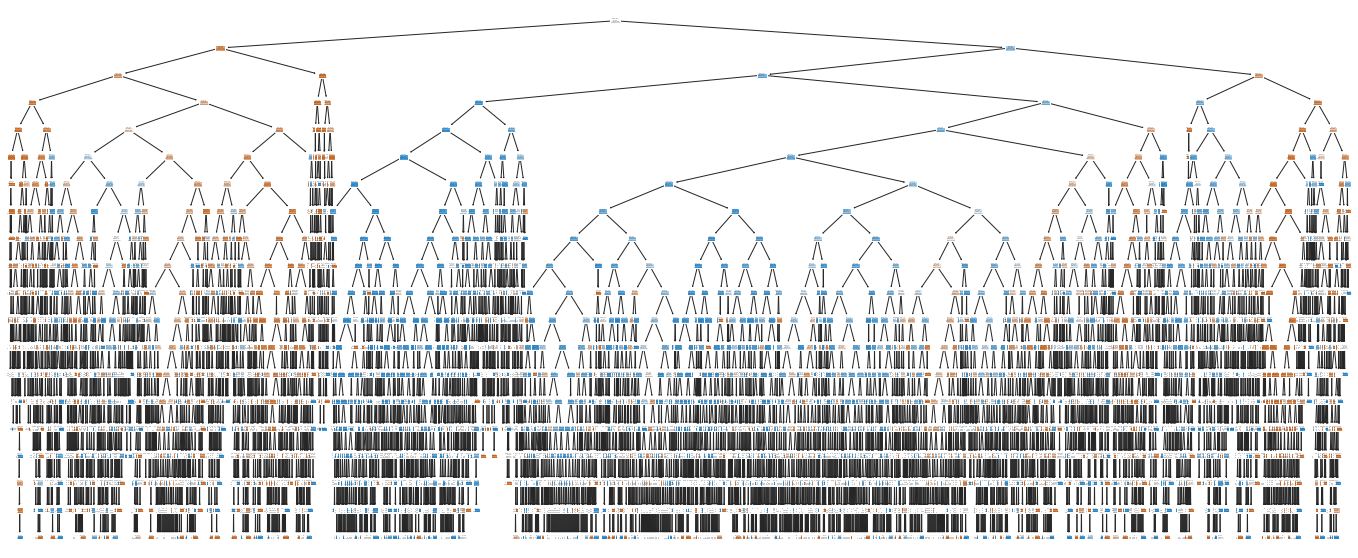

In [101]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,10))
plot_tree(DTC1, filled=True)

*********************************************************************
* Decision Tree (Grid Search CV) Accuracy Score(in %) for Scaled data = 88 %.
*********************************************************************

# Hyperparameters of DecisionTree-' Random Forest'

* The (random forest) algorithm establishes the outcome based on the predictions of the decision trees. It predicts by taking the average or mean of the output from various trees. Increasing the number of trees increases the precision of the outcome.

In [102]:
from sklearn.ensemble import RandomForestClassifier            # importing randomforest

RFC = RandomForestClassifier(n_estimators=100)              # object creation ,taking 100 decision tree in random forest 

RFC.fit(x_train,y_train)                                    # training the data

RandomForestClassifier()

In [103]:
y_predict= RFC.predict(x_test)                               #testing

In [104]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7348
           1       0.90      0.95      0.92      7267

    accuracy                           0.92     14615
   macro avg       0.92      0.92      0.92     14615
weighted avg       0.92      0.92      0.92     14615



In [105]:
# performing hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import StratifiedKFold

In [106]:
RFC_param= { 
           "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
           "max_features": ["auto", "sqrt", "log2"],
            #"max_depth": [4,5,6,7,8],
           "max_depth": [int(x) for x in np.linspace(start=5, stop=30, num=6)],
           "min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy'] 
          }

CV_RF= StratifiedKFold(n_splits=5)

RS_RF= RandomizedSearchCV(RFC, RFC_param, cv=CV_RF, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)

RS_RF.fit(x_train, y_train)

print("best score is:", RS_RF.best_score_)
print("best parameters are:", RS_RF.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.9127698457233123
best parameters are: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'entropy'}


In [107]:
# Model Performance 

y_pred_rf=RS_RF.predict(x_test)
print(confusion_matrix(y_test, y_pred_rf))

[[6561  787]
 [ 420 6847]]


In [108]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      7348
           1       0.90      0.94      0.92      7267

    accuracy                           0.92     14615
   macro avg       0.92      0.92      0.92     14615
weighted avg       0.92      0.92      0.92     14615



*********************************************************************
* Decision Tree (Random Forest) Accuracy Score(in %) for Scaled data = 92 %.
*********************************************************************

# ANN

In [109]:
!pip install tensorflow

In [110]:
import tensorflow
tensorflow.__version__

'2.9.1'

In [111]:
x_train,x_test,y_train,y_test= train_test_split(X_sm, Y_sm, test_size=0.20, random_state=42)

In [112]:
x_train.shape

(58459, 13)

**Importing the Keras Library and Packages**

In [113]:
import tensorflow.keras
from tensorflow.keras.models import Sequential      # 'Sequential' library help in creating any kind of neural networks.
from tensorflow.keras.layers import Dense           # 'Dense' to create hidden layers

In [114]:
# Initializing ANN and Creating an ANN model using Sequential API.

classifier= Sequential()

# adding input layer and 1st hidden layer.
classifier.add(Dense(512, kernel_initializer='he_uniform', activation='relu',input_dim=13))
# 10 input parameters with 12 neurons in the first hidden layer.

# Adding the 2nd hidden layer.
classifier.add(Dense(512, kernel_initializer = 'he_uniform',activation='relu')) 


# Adding the 3rd hidden layer.
classifier.add(Dense(512, kernel_initializer = 'he_uniform',activation='relu')) 


# Adding the 4th hidden layer.
classifier.add(Dense(512, kernel_initializer = 'he_uniform',activation='relu')) 


# Adding the output layer.
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling
classifier.compile(optimizer='adam',loss='binary_crossentropy' ,metrics=['accuracy'])


In [115]:
classifier.summary()                         # input layer will not be included in this

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7168      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 795,649
Trainable params: 795,649
Non-trainable params: 0
_________________________________________________________________


* Total params - how many weight and bias params are there.
* Trainable params: number of weights that will be updated during training with backpropagation.
* Non-trainable params: number of weights that will not be updated during training with backpropagation.

In [116]:
# Fitting the ANN to the Training set

model_history=classifier.fit(x_train, y_train,validation_split=0.10, batch_size = 100,epochs = 100)


Epoch 1/100
527/527 [==============================] - 4s 6ms/step - loss: 3.8584 - accuracy: 0.6222 - val_loss: 0.7007 - val_accuracy: 0.6673
Epoch 2/100
527/527 [==============================] - 3s 6ms/step - loss: 0.5956 - accuracy: 0.6749 - val_loss: 0.8095 - val_accuracy: 0.6803
Epoch 3/100
527/527 [==============================] - 3s 6ms/step - loss: 0.5648 - accuracy: 0.7030 - val_loss: 0.7123 - val_accuracy: 0.6955
Epoch 4/100
527/527 [==============================] - 3s 6ms/step - loss: 0.5567 - accuracy: 0.7148 - val_loss: 0.5904 - val_accuracy: 0.6348
Epoch 5/100
527/527 [==============================] - 3s 6ms/step - loss: 0.5550 - accuracy: 0.7295 - val_loss: 0.5836 - val_accuracy: 0.6329
Epoch 6/100
527/527 [==============================] - 3s 6ms/step - loss: 0.5058 - accuracy: 0.7519 - val_loss: 0.5175 - val_accuracy: 0.7550
Epoch 7/100
527/527 [==============================] - 3s 6ms/step - loss: 0.5194 - accuracy: 0.7464 - val_loss: 0.5162 - val_accuracy: 0.7672

In [117]:
model_history.history.keys()
# for a model trained on a classification problem with a validation dataset, this might 
# produce the following listing

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


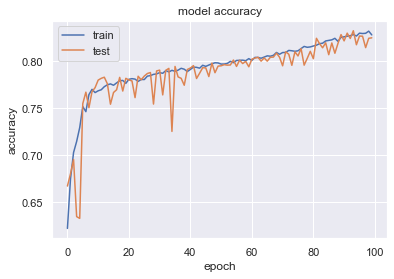

In [118]:
# list all data in history
print(model_history.history.keys())

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

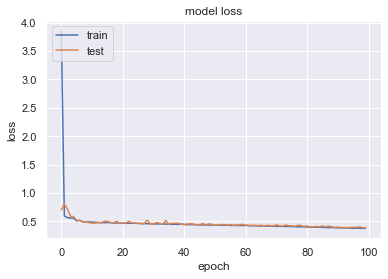

In [119]:
# summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [120]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred

457/457 [==============================] - 3s 1ms/step


array([[3.9913520e-01],
       [9.2810309e-01],
       [9.3656784e-01],
       ...,
       [6.8761842e-06],
       [1.8665075e-01],
       [9.2409194e-01]], dtype=float32)

In [121]:
y_pred = (y_pred > 0.5)              # outputs a boolean matrix
y_pred

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [122]:
print(confusion_matrix(y_test, y_pred))

[[5591 1757]
 [ 812 6455]]


In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      7348
           1       0.79      0.89      0.83      7267

    accuracy                           0.82     14615
   macro avg       0.83      0.82      0.82     14615
weighted avg       0.83      0.82      0.82     14615



*********************************************************************
* ANN- Accuracy Score(in %) for Scaled data = 82 %.
*********************************************************************

# Conclusion

* Logistic Regression test accuracy : 74%.

* KNN Algorithm test Accuracy : 89%.
    
* Decision Tree test accuracy : 79%.
  
* Decision Tree- Grid Search CV- 88%.

* Decision Tree-Random Forest test accuracy :- 92%.
    
* ANN test accuracy is : 82%.
    
    


**So after seeing the results of various models, Decision Tree-Random Forest has highest accuracy.**